In [1]:
import pytesseract
from time import sleep, time
from PIL import ImageGrab, Image
from shapely.geometry import Polygon, Point

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

from src.bot import *
from src.tasks import *
from src.navigation import *
from src.vision import *
from src.position import *
from src.enums.pixels import *
from src.enums.images import *
from src.enums.texts import *
from src.utils import *
from src.players_recognition.players_detector import *
%matplotlib inline

# Connecter API Cloud Vision
# recup le fichier json de la clé
# si cmd
# !set GOOGLE_APPLICATION_CREDENTIALS=environments\bot-among-us-311007-5e92f33561d5.json
# si cmd et que ça marche pas
# !setx GOOGLE_APPLICATION_CREDENTIALS environments\bot-among-us-311007-5e92f33561d5.json
# si powershell
# !$Env:GOOGLE_APPLICATION_CREDENTIALS = "environments\bot-among-us-311007-5e92f33561d5.json"
# Si ça marche pas il faut redémarrer jupyter (pas juste le notebook)
!echo %GOOGLE_APPLICATION_CREDENTIALS%

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# !pip install -r requirements.txt
b = Bot('src/img/new_walkable_small.png', 
        want_to_read_tasks=False, 
        want_to_detect_players=False,
        want_to_connect_discord=False,
        debug_mode=False)

environments\bot-among-us-311007-5e92f33561d5.json


## Auto crewmate

In [7]:
b.stop()

Terminate : <KillableThread(compute_screen, stopped 47864)>
Terminate : <KillableThread(is_new_room, stopped 12368)>
Terminate : <KillableThread(tasks_resolution, stopped 47316)>


In [5]:
# sleep(3)
blacklist_events = [
#     'btnReportChanged', 
#     'btnKillChanged', 
#     'btnSecurityChanged',
#     'btnAdminChanged', 
#     'btnSabotageChanged',
#     'gamePhaseChanged', 
#     'sabotageRunningChanged',
#     'seePeople'
]

### Run with some events not handled
b.run(react_to_events=True, blacklist_events=blacklist_events)
### Run completely autonomous
# b.vision_manager.game_phase = None
# b.run()

Start : <KillableThread(compute_screen, initial)>
catch
Game phase : Do your tasks ! 🏃‍♂️
Start : <KillableThread(tasks_resolution, initial)>
Game phase : Memorize your rooms !
Start : <KillableThread(is_new_room, initial)>
Didn't find me ! 🙈
Next task : Fix Wires (Storage)
Didn't find me ! 🙈


In [5]:
b.stop()

Didn't find a path between source and target ! 🐾
Terminate : <KillableThread(compute_screen, stopped 55688)>
Terminate : <KillableThread(detect_players, stopped 55868)>
Terminate : <KillableThread(is_new_room, started 1632)>
Terminate : <KillableThread(tasks_resolution, started 60396)>


Exception ignored in: <function BaseGeometry.__del__ at 0x0000019676B1A3A0>
Traceback (most recent call last):
  File "C:\Users\iriba\anaconda3\lib\site-packages\shapely\geometry\base.py", line 242, in __del__
    self.empty(val=None)
  File "C:\Users\iriba\anaconda3\lib\site-packages\shapely\geometry\base.py", line 232, in empty
    self._is_empty = True
  File "C:\Users\iriba\anaconda3\lib\site-packages\shapely\geometry\base.py", line 232, in empty
    self._is_empty = True
  File "C:\Users\iriba\EISTI\PFE\among-us-bot\src\utils.py", line 153, in localtrace
    raise SystemExit()
SystemExit: 


## Detect players thread (in vision loop)

In [3]:
VisionManager().start_detect_players()

Start: <KillableThread(detect_players, initial)>
(LOG) 0.0 - 


In [4]:
VisionManager().is_detect_players_running()

False

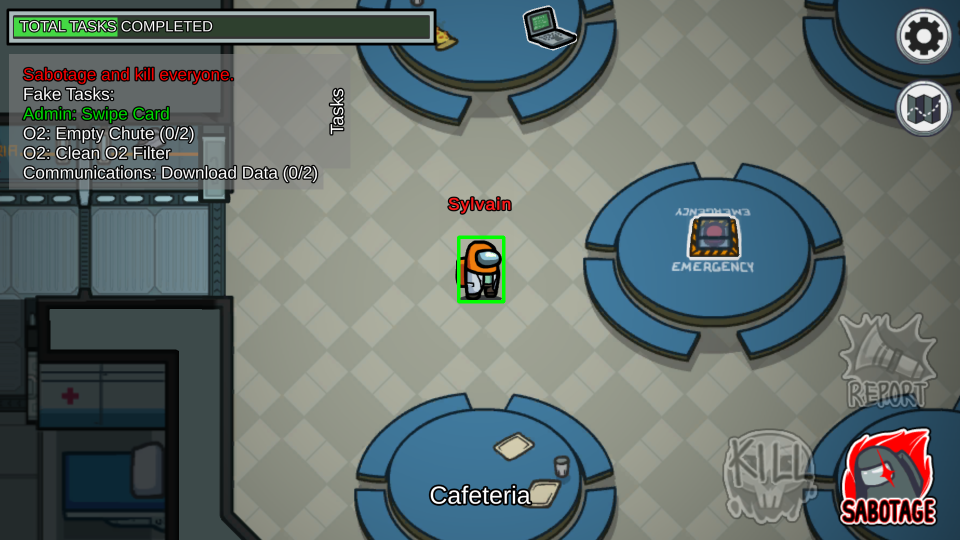

In [6]:
import cv2.cv2 as cv
im = cv.cvtColor(VisionManager().vision_screen_transformed, cv.COLOR_BGR2RGB)
im = cv.resize(im, (960, 540))
Image.fromarray(im)

In [5]:
VisionManager().stop_vision_loop()

Found 0 player(s)
Start: <KillableThread(detect_players, initial)>
Found 0 player(s)
Start: <KillableThread(detect_players, initial)>
Terminate : <KillableThread(compute_screen, stopped 47496)>
Terminate : <KillableThread(detect_players, started 52044)>


In [4]:
VisionManager().start_vision_loop()

Start: <KillableThread(detect_players, initial)>
Found 0 player(s)
Start: <KillableThread(detect_players, initial)>
Found 1 player(s)
Start: <KillableThread(detect_players, initial)>
Found 1 player(s)
Start: <KillableThread(detect_players, initial)>
(LOG) 0.0 -  - Players {BLACK_PLAYER}
Found 2 player(s)
Start: <KillableThread(detect_players, initial)>
(LOG) 0.0 - 
Found 1 player(s)
Start: <KillableThread(detect_players, initial)>
Found 1 player(s)
Start: <KillableThread(detect_players, initial)>
Found 1 player(s)
Start: <KillableThread(detect_players, initial)>
Found 1 player(s)
Start: <KillableThread(detect_players, initial)>
(LOG) 0.0 -  - Players {RED_PLAYER}
Found 2 player(s)
Start: <KillableThread(detect_players, initial)>
(LOG) 0.0 -  - Players {BLACK_PLAYER}
Found 2 player(s)
Start: <KillableThread(detect_players, initial)>
(LOG) 0.0 - 
Found 0 player(s)
Start: <KillableThread(detect_players, initial)>
Found 1 player(s)
Start: <KillableThread(detect_players, initial)>
(LOG) 0.0

In [8]:
VisionManager().is_vision_looping()

False

### Détection couleurs crewmate
sortie du modéle
ymin xmin ymax xmax en pourentage de l'écran (haut gauche bas droite)

In [16]:
# get_player_color((1018,527), (1100, 597))
b.vision_manager.start_vision_loop()

Start: <KillableThread(detect_players, initial)>
(LOG) 0.0 - 
Found 1 player(s)
Start: <KillableThread(detect_players, initial)>
(LOG) 0.0 -  - Players {YELLOW_PLAYER}
Found 2 player(s)
Start: <KillableThread(detect_players, initial)>
(LOG) 0.0 -  - Players {RED_PLAYER}
Found 2 player(s)
Start: <KillableThread(detect_players, initial)>
(LOG) 0.0 -  - Players {YELLOW_PLAYER}
Found 2 player(s)
Start: <KillableThread(detect_players, initial)>
(LOG) 0.0 -  - Players {GREEN_PLAYER}
Found 2 player(s)
Start: <KillableThread(detect_players, initial)>
(LOG) 0.0 - 
Found 1 player(s)
Start: <KillableThread(detect_players, initial)>
Found 1 player(s)
Start: <KillableThread(detect_players, initial)>
Found 1 player(s)
Start: <KillableThread(detect_players, initial)>
Found 1 player(s)
Start: <KillableThread(detect_players, initial)>
Found 1 player(s)
Start: <KillableThread(detect_players, initial)>
(LOG) 0.0 -  - Players {BLUE_PLAYER}
Found 2 player(s)
Start: <KillableThread(detect_players, initial)>

In [18]:
b.brain_manager.log = b.brain_manager.log.drop(index=0)

In [3]:
b.brain_manager.log

Exception in thread is_new_room:
Traceback (most recent call last):
  File "C:\Users\iriba\anaconda3\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "C:\Users\iriba\EISTI\PFE\among-us-bot\src\utils.py", line 141, in __run
    self.__run_backup()
  File "C:\Users\iriba\anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\iriba\EISTI\PFE\among-us-bot\src\brain.py", line 371, in is_new_room
    def is_new_room(self, write_log=True):
  File "C:\Users\iriba\EISTI\PFE\among-us-bot\src\brain.py", line 354, in update_room
    print("Terminate :", self.memorize_room_thread)
NameError: name 'SkeldMap' is not defined


,room,time,players,killed,task
0,,0.0,[],[],Align Engine (Lower Engine)
0,,0.0,[],[],Chart Course
0,,0.0,[],[],Clean O2 Filter
0,,0.0,[],[],Clear Asteroids
0,,0.0,[],[],Divert Power
0,,0.0,[],[],Accept Power (Communications)
0,Cafeteria,0.0,[],[],
0,Storage,0.0,[],[],
0,Cafeteria,0.0,[],[],
0,Storage,0.0,[],[],


In [10]:
b.position.find_me()

(493, 263)

In [18]:
start = time.time()
detection_model = PlayersDetector()
print(f"It took {time.time() - start:.2f} seconds for loading model")

Building model and restoring weights for fine-tuning...
Weights restored!
It took 3.29 seconds for loading model


It took 12.10 seconds for prediction


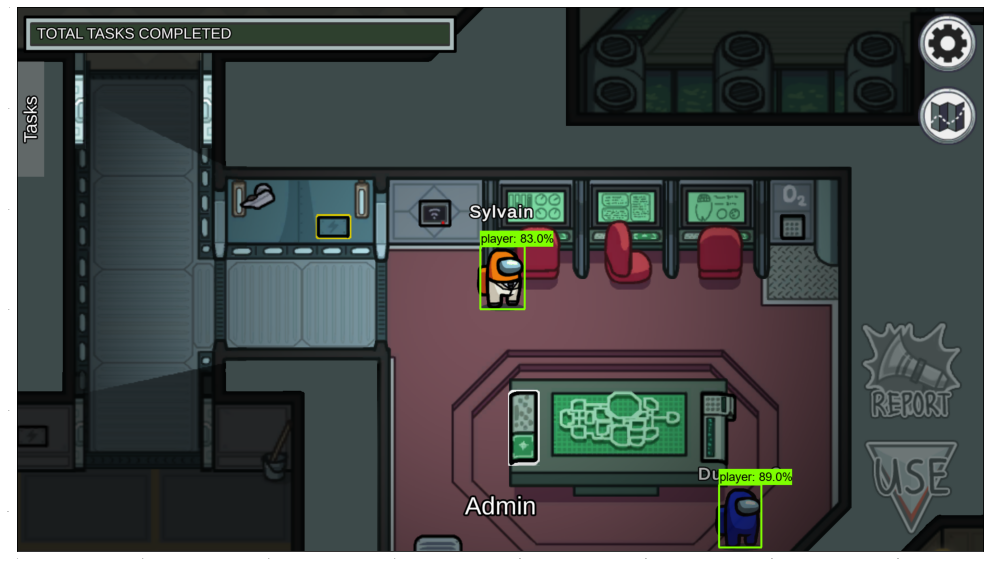

In [19]:
screenshot = np.array(pyautogui.screenshot())
start = time.time()
# matplotlib.use('tkagg')
detections = detection_model.detect_from_np_array(screenshot)
print(f"It took {time.time() - start:.2f} seconds for prediction")
plt.rcParams['figure.figsize'] = [18, 10]
plot_prediction(screenshot, detections)

boxes = detections['detection_boxes'][0].numpy()
scores = detections['detection_scores'][0].numpy()
classes = detections['detection_classes'][0].numpy().astype(np.uint32)
# display(Image.screenshot))
# Image.fromarray(screenshot)

In [20]:
# get predictions above a threshold
print(scores[scores>0.7])
boxes[scores>0.7]

[0.89027584 0.8306682 ]


array([[0.87786984, 0.72586644, 0.993117  , 0.7700573 ],
       [0.44023353, 0.4789128 , 0.555409  , 0.5253434 ]], dtype=float32)

## Vision

In [4]:
sleep(3)
VisionManager().want_to_read_tasks = True
VisionManager().start_vision_loop()

memorize players


In [3]:
VisionManager().stop_vision_loop()

Terminate : <KillableThread(compute_screen, started 81060)>
Terminate : <KillableThread(read_tasks, stopped 84420)>


In [3]:
print("vision thread alive:", VisionManager().is_vision_looping())
print("read tasks thread alive:", VisionManager().is_read_tasks_running())

vision thread alive: False
read tasks thread alive: False


### Check Button 


In [9]:
sleep(2)
print("impostor :", b.vision_manager.is_impostor())
print(b.vision_manager.get_game_phase())
print("use :", b.vision_manager.is_btn_use_active())
print("report :", b.vision_manager.is_btn_report_active())
print("kill :", b.vision_manager.is_btn_kill_active())
print("vent :", b.vision_manager.is_btn_vent_active())
print("sabotage :", b.vision_manager.is_btn_sabotage_active())
print("admin :", b.vision_manager.is_btn_admin_active())
print("security :", b.vision_manager.is_btn_security_active())

impostor : True
GamePhase.Game
use : False
report : False
kill : False
vent : False
sabotage : False
admin : False
security : False


### Get the nearest Task

In [4]:
b.get_tasks()

[5: Clear Asteroids,
 6: Divert Power,
 19: Fix Wires (Storage),
 36: Download/Upload (Communications)]

In [13]:
b.get_tasks()[2].location

(978, 696)

In [11]:
tasks = b.get_tasks()
for task in tasks:
    print(len(b.game_map.navigation_manager.calculate_path(b.position.find_me(), task.location)))

0
0
36
0


In [14]:
b.get_nearest_task()
b.next_task

Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾


5: Clear Asteroids

In [19]:
b.position.find_me()

(1439, 319)

## Navigate

In [24]:
def debug_neighboor_matrix(location, size=3):
    x, y = NavigationManager().convert_for_minimap(location)
    print(x-size,x+size,y-size,y+size)
    print(NavigationManager().map_matrix[y-size:y+size,x-size:x+size])

In [26]:
sleep(3)
location = (1320, 600)
b.go_to_destination(location)
debug_neighboor_matrix(location, 3)

327 333 147 153
[[3 3 3 0 0 0]
 [3 3 3 3 3 0]
 [3 3 3 3 3 3]
 [3 3 3 3 3 3]
 [3 3 1 3 3 3]
 [3 1 1 1 3 3]]


In [23]:
accept_power_task = b.game_map.task_manager.tasks[12]
accept_power_security_location = (550, 460)

shield_location_apeupres = b.game_map.task_manager.tasks[28].location

##### Demo #####
b.go_to_destination(accept_power_security_location)
# la ligne suivante c'est au cas où
b.go_to_destination(accept_power_security_location)

b.perform_task(accept_power_task)

b.go_to_destination(shield_location_apeupres)
# la ligne suivante c'est au cas où
b.go_to_destination(shield_location_apeupres)

Didn't find me ! 🙈


### Check for tasks not reachable

In [12]:
len_paths = [len(b.get_moving_actions_to_destination(task.location)) for task in b.game_map.task_manager.tasks]
for i in range(len(len_paths)):
    if len_paths[i] == 0:
        print(f"- **{b.game_map.task_manager.tasks[i]}**")
    else:
        print(f"- OK : {b.game_map.task_manager.tasks[i]}")

Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find me ! 🙈
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
D

Not found tasks :
- 0: Align Engine (Upper Engine)
- 1: Align Engine (Lower Engine)
- 2: Calibrate Distributor
- 3: Chart Course
- 5: Clear Asteroids
- 6: Divert Power
- 11: Accept Power (O2)
- 12: Accept Power (Security)
- 13: Accept Power (Shields)
- 14: Accept Power (Weapons)
- 15: Empty Garbage/Chute (Cafeteria)
- 17: Empty Garbage/Chute (Storage)
- 21: Fix Wires (Navigation)
- 22: Fix Wires (Admin)
- 27: Inspect Sample
- 29: Stabilize Steering
- 31: Submit Scan
- 34: Download/Upload (Cafeteria)
- 35: Download/Upload (Admin)
- 36: Download/Upload (Communications)
- 37: Download/Upload (Electrical)

### NAVIGAAAAAATE 🐾🐾🐾

In [4]:
b.position.find_me()
b.position.get_tuple_coordinates()

(346, 869)

### Navigate and do these tasks

In [ ]:
tasks_indexes = [4, 7, 8, 9, 10, 16, 18, 19, 20, 23, 24, 25, 26, 28, 30, 32, 33, 38, 39]
tasks = [b.game_map.task_manager.tasks[i] for i in tasks_indexes]
for task in tasks:
    print(f"Go to {task.name}")
    b.go_to_destination(task.location)
    print(f"Perform {task.name}")
    b.perform_task(task)

Go to Clean O2 Filter
Perform Clean O2 Filter
Go to Accept Power (Communications)
Didn't find me ! 🙈
Didn't find me ! 🙈
Perform Accept Power (Communications)
Go to Accept Power (Lower Engine)
Didn't find me ! 🙈
Perform Accept Power (Lower Engine)
Go to Accept Power (Upper Engine)
Didn't find me ! 🙈
Perform Accept Power (Upper Engine)
Go to Accept Power (Navigation)
Didn't find me ! 🙈
Perform Accept Power (Navigation)
Go to Empty Garbage/Chute (O2)
Didn't find me ! 🙈
Perform Empty Garbage/Chute (O2)
Go to Fix Wires (Electrical)
Perform Fix Wires (Electrical)
Go to Fix Wires (Storage)
Didn't find me ! 🙈
Perform Fix Wires (Storage)
Go to Fix Wires (Security)
Didn't find me ! 🙈
Didn't find a path between source and target ! 🐾
Perform Fix Wires (Security)
Go to Fix Wires (Cafeteria)
Didn't find me ! 🙈
Didn't find a path between source and target ! 🐾
Perform Fix Wires (Cafeteria)
Go to Fuel Engine (Storage)
Perform Fuel Engine (Storage)
Go to Fuel Engine (Lower Engine)
Perform Fuel Engine (L

In [5]:
# result_file_path="src/img/result_path.txt"
# grid_str = navManager.path_to_grid(path, must_print=False, result_file_path=None)

## Talk during walking (experiments)

## Solve a task

In [27]:
b.game_map.task_manager.prompt_task()

What task would you like to perform?:
0: Troubleshoot
1: Swipe_Card
2: Download_Upload
3: Fuel_Engines
4: Divert_Power
5: Empty_Chute
6: Accept_Power
7: Fix_Wires
8: Prime_Shields
9: Inspect_Sample
10: Stabilize_Steering
11: Submit_Scan
12: Align_Engine_Output
13: Clear_Asteroids
14: Clean_O2_Filter
15: Calibrate_Distributor
16: Start_Reactor
17: Chart_Course
18: Unlock_Manifold


options: 13


## Complete menu

In [5]:
b.menu()

## Troubleshoot

In [19]:
TaskManager().solve_task(TaskType.Troubleshoot)
# red 377,150
# white 354,225
# red/yellow 325,386
# black 326,347

Point(x=1218, y=805)
Point(x=1218, y=803)
Point(x=1218, y=803)
Point(x=1218, y=803)
Point(x=1305, y=868)
Point(x=1305, y=868)
Point(x=1305, y=868)
Point(x=1305, y=868)
Point(x=1305, y=868)
Point(x=1305, y=868)
Point(x=3356, y=243)


KeyboardInterrupt: 

In [21]:
m = pyautogui.screenshot(region=(1093, 353, 1, 1))
print("rouge",m.getpixel((0,0)))
m = pyautogui.screenshot(region=(1217, 350, 1, 1))
print("blue",m.getpixel((0,0)))
m = pyautogui.screenshot(region=(1315, 354, 1, 1))
print("green",m.getpixel((0,0)))
m = pyautogui.screenshot(region=(1345, 455, 1, 1))
print("yellow",m.getpixel((0,0)))
m = pyautogui.screenshot(region=(1220, 476, 1, 1))
print("orange",m.getpixel((0,0)))
m = pyautogui.screenshot(region=(1069, 479, 1, 1))
print("pink",m.getpixel((0,0)))
m = pyautogui.screenshot(region=(1312, 590, 1, 1))
print("purple",m.getpixel((0,0)))
m = pyautogui.screenshot(region=(1182, 596, 1, 1))
print("white",m.getpixel((0,0)))
m = pyautogui.screenshot(region=(1104, 595, 1, 1))
print("black",m.getpixel((0,0)))
m = pyautogui.screenshot(region=(1087, 699, 1, 1))
print("brown",m.getpixel((0,0)))
m = pyautogui.screenshot(region=(1208, 697, 1, 1))
print("cyan",m.getpixel((0,0)))
m = pyautogui.screenshot(region=(1347, 699, 1, 1))
print("lime",m.getpixel((0,0)))

rouge (118, 53, 53)
blue (19, 46, 210)
green (17, 128, 45)
yellow (246, 246, 87)
orange (240, 125, 13)
pink (238, 84, 187)
purple (107, 47, 188)
white (215, 225, 241)
black (63, 71, 78)
brown (113, 73, 30)
cyan (56, 255, 221)
lime (80, 240, 57)


In [15]:
sleep(2)
im = pyautogui.screenshot()
pixel = (1497,991)
im.getpixel(pixel)

(222, 33, 0)

In [12]:
sleep(2)
im = pyautogui.screenshot()
pixel = (PixelPositions.MAIN_BTN.value)
im.getpixel(pixel)

(202, 117, 117)

## Notes

- **0: Align Engine (Upper Engine)**
- **1: Align Engine (Lower Engine)**
- **2: Calibrate Distributor**
- **3: Chart Course**
- **4: Clean O2 Filter**
- **5: Clear Asteroids**
- **6: Divert Power**
- **7: Accept Power (Communications)**
- **8: Accept Power (Lower Engine)**
- **9: Accept Power (Upper Engine)**
- **10: Accept Power (Navigation)**
- **11: Accept Power (O2)**
- **12: Accept Power (Security)**
- **13: Accept Power (Shields)**
- **14: Accept Power (Weapons)**
- **15: Empty Garbage/Chute (Cafeteria)**
- **16: Empty Garbage/Chute (O2)**
- **17: Empty Garbage/Chute (Storage)**
- **18: Fix Wires (Electrical)**
- **19: Fix Wires (Storage)**
- **20: Fix Wires (Security)**
- **21: Fix Wires (Navigation)**
- **22: Fix Wires (Admin)**
- **23: Fix Wires (Cafeteria)**
- **24: Fuel Engine (Storage)**
- **25: Fuel Engine (Lower Engine)**
- **26: Fuel Engine (Upper Engine)**
- **27: Inspect Sample**
- 28: Prime Shields
- **29: Stabilize Steering**
- **30: Start Reactor**
- **31: Submit Scan**
- **32: Swipe Card**
- **33: Unlock Manifolds**
- **34: Download/Upload (Cafeteria)**
- **35: Download/Upload (Admin)**
- **36: Download/Upload (Communications)**
- **37: Download/Upload (Electrical)**
- **38: Download/Upload (Navigation)**
- **39: Download/Upload (Weapons)**